<a href="https://colab.research.google.com/github/auperez/Analisis-Predictivo/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload y EDA


In [ ]:
# Pandas & matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing
from sklearn.model_selection import RepeatedKFold
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving base_train.csv.zip to base_train.csv.zip


In [ ]:
!ls base_train.csv.zip
df=pd.read_csv("base_train.csv.zip")


base_train.csv.zip


In [ ]:
df.dtypes


Unnamed: 0             int64
symboling              int64
normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [ ]:
#Busco si hay NA
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         800000 non-null  int64  
 1   symboling          800000 non-null  int64  
 2   normalized-losses  800000 non-null  float64
 3   wheel-base         800000 non-null  float64
 4   length             800000 non-null  float64
 5   width              800000 non-null  float64
 6   height             800000 non-null  float64
 7   curb-weight        800000 non-null  float64
 8   engine-size        800000 non-null  float64
 9   bore               800000 non-null  float64
 10  stroke             800000 non-null  float64
 11  compression-ratio  800000 non-null  float64
 12  horsepower         800000 non-null  float64
 13  peak-rpm           800000 non-null  float64
 14  city-mpg           800000 non-null  float64
 15  highway-mpg        800000 non-null  float64
 16  pr

In [ ]:
#Elimino columna de ínidices
del df['Unnamed: 0']

In [ ]:

df=df.loc[df["price"] > 0]
df["price"].describe()

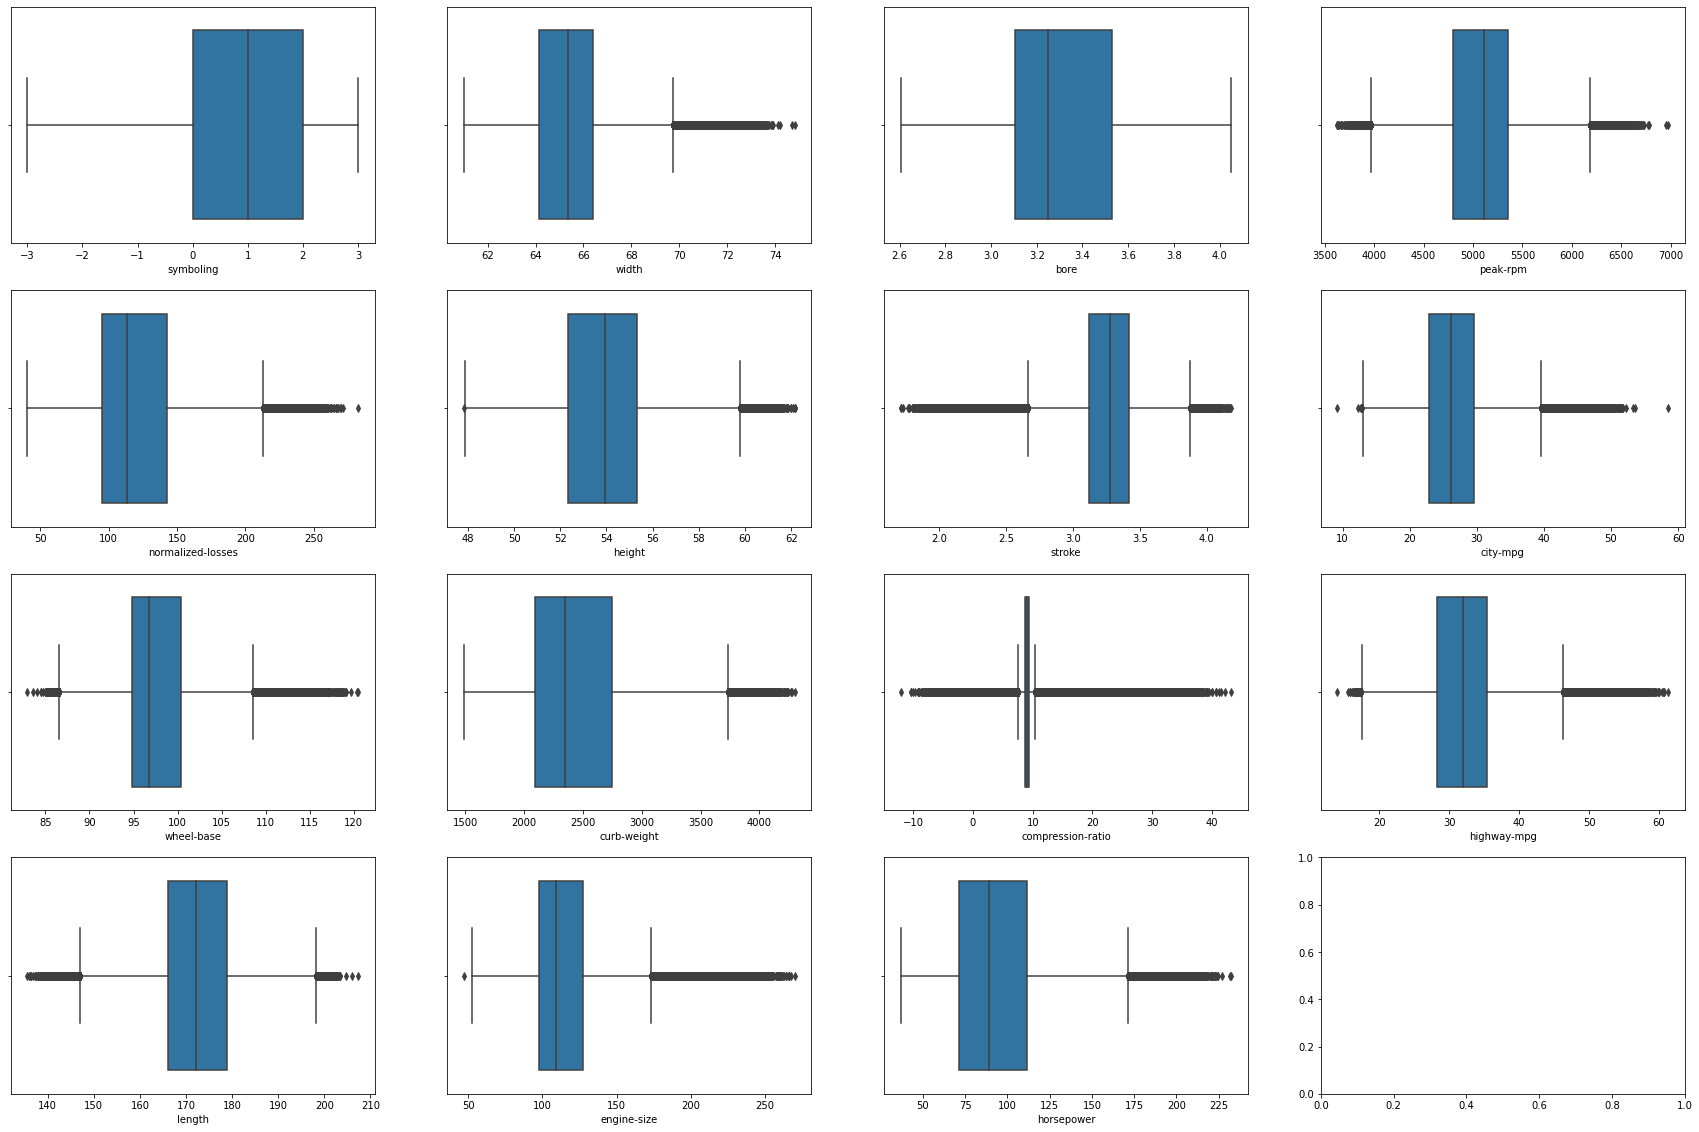

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(30, 20))

sns.boxplot(x=df["symboling"],ax=axs[0,0])
sns.boxplot(x=df["normalized-losses"],ax=axs[1,0])
sns.boxplot(x=df["wheel-base"],ax=axs[2,0])
sns.boxplot(x=df["length"],ax=axs[3,0])
sns.boxplot(x=df["width"],ax=axs[0,1])
sns.boxplot(x=df["height"],ax=axs[1,1])
sns.boxplot(x=df["curb-weight"],ax=axs[2,1])
sns.boxplot(x=df["engine-size"],ax=axs[3,1])
sns.boxplot(x=df["bore"],ax=axs[0,2])
sns.boxplot(x=df["stroke"],ax=axs[1,2])
sns.boxplot(x=df["compression-ratio"],ax=axs[2,2])
sns.boxplot(x=df["horsepower"],ax=axs[3,2])
sns.boxplot(x=df["peak-rpm"],ax=axs[0,3])
sns.boxplot(x=df["city-mpg"],ax=axs[1,3])
sns.boxplot(x=df["highway-mpg"],ax=axs[2,3])

plt.show()

In [ ]:
mask=np.zeros_like(df.corr())
tri_indices=np.triu_indices_from(mask)
mask[tri_indices]=True

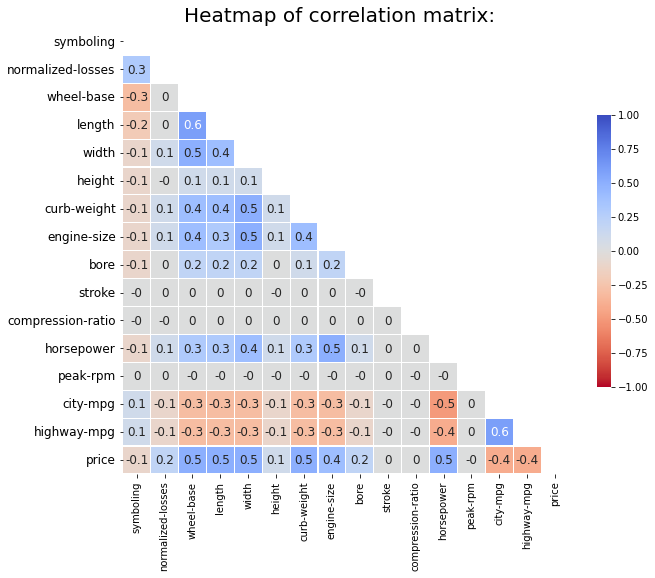

In [ ]:
#Matriz de correlación

plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(1),mask=mask, cmap="coolwarm_r",annot=True,square=True,linewidths=.1,vmin=-1,vmax=1,annot_kws={"size": 12},cbar_kws={"shrink": 0.5})
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.title("Heatmap of correlation matrix:  ",fontsize=20)
#plt.savefig("HeatmapCorr.jpeg")
#files.download("HeatmapCorr.jpeg")
plt.show()

Modelado

In [ ]:
X = df.loc[:, df.columns != 'price'].copy()
y = df['price']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [ ]:
#Busco el número óptimo de árboles

train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(150, 300, 50)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    print(n_estimators)
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

In [ ]:
#Veo r2 de la max depth
profundidad = []

for i in range(15,24,2):
  print(i)
  regr3 = RandomForestRegressor(max_depth=i,random_state=42)
  fregr3 = regr3.fit(X_train,y_train)
  r2_train = fregr3.score(X_train, y_train)
  r2_test = fregr3.score(X_test, y_test)
  profundidad.append([i,r2_train,r2_test])

In [ ]:

scores_profundidad = pd.DataFrame(profundidad, columns=["max_depth","r2_train","r2_test"])
scores_profundidad

,max_depth,r2_train,r2_test
0,1,0.237549,0.241566
1,3,0.442444,0.445608
2,5,0.517744,0.520585
3,7,0.568781,0.569322
4,9,0.612503,0.606015
5,11,0.657982,0.630915
6,13,0.712074,0.644674


In [ ]:
#Busco el número óptimo de "Max Depth"

train_scores = []
oob_scores   = []

# Valores evaluados
depth_range = range(15, 26, 2)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for depth in depth_range:
    print(depth)
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = depth,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(depth_range, train_scores, label="train scores")
ax.plot(depth_range, oob_scores, label="out-of-bag scores")
ax.plot(depth_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("depth")
ax.set_title("Evolución del out-of-bag-error vs max depth")
plt.legend();
print(f"Valor óptimo de max_depth: {depth_range[np.argmax(oob_scores)]}")


In [ ]:
# Validación de "max features" empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    print(max_features)
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

In [ ]:
regrefin=RandomForestRegressor(max_depth=17,n_estimators=150,max_features = 6,random_state=42)
rf_fin=regrefin.fit(X_train,y_train)
r2_train = regrefin.score(X_train, y_train)
r2_test = regrefin.score(X_test, y_test)
profundidad=[]
profundidad.append([17,150,6,r2_train,r2_test])
scores_profundidad = pd.DataFrame(profundidad, columns=["max_depth","Número de árboles","Features","r2_train","r2_test"])
scores_profundidad


,max_depth,Número de árboles,Features,r2_train,r2_test
0,17,150,6,0.823353,0.66326


In [ ]:
#Grid Search basado en out-of-bag error
#============================================

param_grid = {'n_estimators': [100,150,200],
              'max_features': [6],
              'max_depth'   : [None,17,22]
             }
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)


resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150,200,300],
                 'max_features': [6],
                 'max_depth'   : [ 17, 20, 25]
                }
             )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 123,
        ** params            
    )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} \u2713")
        
    return{'params': params, 'oob_r2': modelo.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(X_train, y_train, RandomForestRegressor(), params) for params in param_grid]
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

In [ ]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

In [ ]:
# Importancia de variables 

modelo = RandomForestRegressor(
                n_estimators = 200,
                criterion    = 'squared_error',
                max_depth    = 17,
                max_features = 6,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
modelo.fit(X_train, y_train)
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "price").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
6,curb-weight,0.178417
4,width,0.145806
2,wheel-base,0.120092
11,horsepower,0.093791
3,length,0.083587
14,highway-mpg,0.081407
7,engine-size,0.075638
13,city-mpg,0.062027
0,symboling,0.051613
1,normalized-losses,0.036578


In [ ]:
uploaded = files.upload()
!ls base_val.csv
val=pd.read_csv("base_val.csv")
pred_val = fregr3.predict(val.iloc[:,1:16])
solution = pd.DataFrame(data={"price": pred_val}).astype(str)
solution.index = val.iloc[:,0]
solution.to_csv("randomforest.csv", sep=',',index=True,  index_label='id')
print(solution)


In [ ]:
files.download("randomforest.csv")